# Agrupamento

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler

## K-means

### Base idade e salário

In [2]:
from sklearn.cluster import KMeans
X = [20, 27, 21, 37, 48, 53, 55, 47, 52, 32, 39, 48, 48]
Y = [1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000]

In [3]:
print(len(X))
print(len(Y))

13
13


In [4]:
grafico = px.scatter(x=X, y=Y)
grafico.show()

In [5]:
base_salario = np.array([[20, 1000], [27, 1200], [21, 2900], [37, 1850], [46, 900],
                         [53, 950], [55, 2000], [47, 2100], [52, 3000], [32, 5900],
                         [39, 4100], [41, 5100], [39, 7000], [48, 5000], [48, 6500]])

In [6]:
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [7]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)

In [8]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [9]:
kmeans_salario = KMeans(n_clusters=3)
kmeans_salario.fit(base_salario)

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [10]:
centroides = kmeans_salario.cluster_centers_
centroides

array([[ 0.07703438,  1.11413572],
       [ 0.73953003, -0.72661025],
       [-1.63312883, -0.77505093]])

In [11]:
scaler_salario.inverse_transform(kmeans_salario.cluster_centers_)

array([[  41.16666667, 5600.        ],
       [  48.33333333, 1800.        ],
       [  22.66666667, 1700.        ]])

In [12]:
rotulos = kmeans_salario.labels_
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [13]:
grafico1 = px.scatter(x=base_salario[:, 0], y=base_salario[:, 1], color=rotulos)
grafico2 = px.scatter(x=centroides[:, 0], y=centroides[:, 1], size=[12, 12, 12])
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3.show()

### Dados randômicos

In [14]:
from sklearn.datasets import make_blobs
X_random, Y_random = make_blobs(n_samples=200, centers=5)

In [15]:
X_random

array([[ -8.76363157,   1.35116688],
       [  7.74369014,  -3.05826026],
       [ -9.01233559,   6.21288851],
       [-10.39370681,  -8.46075394],
       [ -8.71337433,   4.21445207],
       [-10.48551621,  -7.54912638],
       [  6.78816888,  -4.96888228],
       [  9.00318172,  -5.47047627],
       [-10.19373355,   3.2477364 ],
       [ -7.50229414,   1.85522046],
       [-10.8233221 ,   1.7255978 ],
       [  7.35932187,  -3.54893271],
       [ -9.184973  ,   1.95457813],
       [ -8.25511507,   5.21819083],
       [ -7.75802742,   6.25468232],
       [-10.90731341,   1.19196639],
       [ -8.48210565,  -7.72714149],
       [ -8.77476453,   5.16795858],
       [ -9.68239004,  -6.71518124],
       [ -7.24623349,   5.45151956],
       [ -7.78455469,   4.83778965],
       [ -9.94712314,   2.50523186],
       [  7.54024834,  -4.79779869],
       [ -8.28163335,  -8.15023896],
       [-10.08972632,  -7.26891398],
       [ -8.80104213,  -7.86951066],
       [  8.18820611,  -4.90141698],
 

In [16]:
Y_random

array([0, 2, 1, 3, 4, 3, 2, 2, 4, 4, 0, 2, 0, 1, 1, 0, 3, 1, 3, 1, 1, 4,
       2, 3, 3, 3, 2, 2, 2, 2, 3, 4, 3, 0, 4, 3, 3, 3, 3, 2, 4, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 3, 2, 1, 4, 2, 3, 4, 2, 0, 1, 0, 0, 2, 2, 0, 3,
       4, 2, 2, 4, 1, 1, 4, 2, 3, 0, 1, 3, 4, 1, 2, 2, 3, 0, 4, 1, 1, 0,
       3, 2, 0, 3, 3, 2, 1, 1, 0, 3, 1, 4, 3, 4, 1, 1, 2, 4, 0, 4, 0, 0,
       4, 3, 3, 4, 2, 4, 4, 1, 4, 2, 4, 3, 4, 1, 3, 3, 4, 2, 0, 3, 0, 1,
       0, 0, 0, 1, 0, 4, 4, 0, 4, 0, 0, 2, 1, 2, 3, 3, 2, 1, 1, 4, 0, 1,
       0, 3, 4, 0, 2, 1, 2, 2, 1, 2, 3, 4, 3, 2, 2, 1, 1, 0, 2, 3, 0, 3,
       4, 4, 0, 4, 4, 3, 2, 0, 0, 3, 1, 1, 4, 4, 1, 0, 2, 1, 1, 1, 3, 4,
       4, 2])

In [17]:
grafico = px.scatter(x=X_random[:, 0], y=X_random[:, 1])
grafico.show()

In [18]:
kmeans_blobs = KMeans(n_clusters=5)
kmeans_blobs.fit(X_random)

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

In [19]:
rotulos = kmeans_blobs.predict(X_random)
rotulos

array([1, 0, 3, 2, 4, 2, 0, 0, 4, 4, 1, 0, 4, 3, 3, 1, 2, 3, 2, 3, 3, 4,
       0, 2, 2, 2, 0, 0, 0, 0, 2, 4, 2, 1, 4, 2, 2, 2, 2, 0, 4, 1, 1, 1,
       1, 3, 0, 1, 3, 4, 2, 0, 3, 4, 0, 2, 4, 0, 1, 3, 1, 1, 0, 0, 1, 2,
       4, 0, 0, 4, 3, 3, 4, 0, 2, 1, 3, 2, 4, 3, 0, 0, 2, 1, 3, 3, 4, 1,
       2, 0, 1, 2, 2, 0, 3, 3, 1, 2, 3, 4, 2, 4, 4, 3, 0, 4, 1, 4, 1, 1,
       4, 2, 2, 4, 0, 4, 1, 3, 4, 0, 4, 2, 4, 3, 2, 2, 4, 0, 1, 2, 1, 3,
       1, 1, 1, 3, 1, 4, 4, 1, 4, 1, 1, 0, 4, 0, 2, 2, 0, 3, 3, 4, 1, 3,
       1, 2, 3, 1, 0, 3, 0, 0, 3, 0, 2, 4, 2, 0, 0, 3, 3, 1, 0, 2, 1, 2,
       4, 4, 1, 4, 4, 2, 0, 1, 1, 2, 3, 3, 4, 1, 4, 4, 0, 3, 3, 3, 2, 4,
       4, 0])

In [20]:
centroides = kmeans_blobs.cluster_centers_
centroides

array([[  7.95090829,  -5.01442584],
       [-10.08492298,   0.31921361],
       [ -9.40978808,  -7.28150427],
       [ -7.70294234,   5.88961003],
       [ -9.43802977,   3.12343812]])

In [21]:
grafico1 = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color=rotulos)
grafico2 = px.scatter(x=centroides[:, 0], y=centroides[:, 1], size=[5, 5, 5, 5, 5])
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3.show()

## Cartão de crédito

In [22]:
import pandas as pd
base_cartao = pd.read_csv("credit_card_clients.csv", header=1)
base_cartao

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [23]:
base_cartao['BILL_TOTAL'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4'] + base_cartao['BILL_AMT5'] + base_cartao['BILL_AMT6']
base_cartao

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0         -1  ...          0          0         0       689         0   
1          0  ...       3455       3261         0      1000      1000   
2          0  ...      14948      15549      1518      1500      1000   
3          0  ...      28959      29547      2000      2019      1200   
4          0  ...      19146      19131      2000     36681     10000   
...      ...  ...        ...        ...       ...       ...       ...   
29995      0  ...      31237      15980      8500     20000      5003   
29996     -1  ...       5190          0      1837      3526      8998   
29997     -1  ...      20582      19357         0         0     22000   
29998      0  ...      11855      48944     85900      3409      1178   
29999      0  ...      32428      15313      2078      1800      1430   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  BILL_TOTAL  
0             0         0         0                           1        7704  
1          1000         0      2000                           1       17077  
2          1000      1000      5000                           0      101653  
3          1100      1069      1000                           0      231334  
4          9000       689       679                           0      109339  
...         ...       ...       ...                         ...         ...  
29995      3047      5000      1000                           0      725349  
29996       129         0         0                           0       21182  
29997      4200      2000      3100                           1       70496  
29998      1926     52964      1804                           1      266611  
29999      1000      1000      1000                           1      230874  

[30000 rows x 26 columns]

In [24]:
X_cartao = base_cartao.iloc[:, [1, 25]].values
X_cartao

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [25]:
scale_cartao = StandardScaler()
X_cartao = scale_cartao.fit_transform(X_cartao)
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [26]:
wcss = []
for i in range(1, 11):
  kmeans_cartao = KMeans(n_clusters=i, random_state=0)
  kmeans_cartao.fit(X_cartao)
  wcss.append(kmeans_cartao.inertia_)

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [27]:
print(wcss)

[59999.99999999988, 35197.61457982185, 20128.131075933066, 14943.801288165874, 10707.346740388295, 8603.402406648676, 7398.266087917011, 6354.390259676868, 5665.834420607423, 5052.690789379018]


In [28]:
grafico = px.line(x=range(1, 11), y=wcss)
grafico.show()

In [29]:
kmeans_cartao = KMeans(n_clusters=4, random_state=0)
rotulos = kmeans_cartao.fit_predict(X_cartao)

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [30]:
grafico = px.scatter(x=X_cartao[:, 0], y=X_cartao[:, 1], color=rotulos)
grafico.show()

In [31]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      2],
       [     2, 120000,      2, ...,      1,  17077,      2],
       [     3,  90000,      2, ...,      0, 101653,      2],
       ...,
       [ 29998,  30000,      1, ...,      1,  70496,      2],
       [ 29999,  80000,      1, ...,      1, 266611,      2],
       [ 30000,  50000,      1, ...,      1, 230874,      2]], dtype=int64)

In [32]:
lista_clientes = lista_clientes[lista_clientes[:, 26].argsort()]
lista_clientes

array([[  25677,  280000,       2, ...,       0,     271,       0],
       [  24956,  360000,       1, ...,       0,   12066,       0],
       [   8073,  300000,       2, ...,       0,  385113,       0],
       ...,
       [  28233,  340000,       2, ...,       0, 1767174,       3],
       [  28230,  400000,       2, ...,       1, 1041017,       3],
       [  21115,  480000,       1, ...,       0, 2393929,       3]],
      dtype=int64)

In [33]:
X_cartao_mais = base_cartao.iloc[:, [1, 2, 3, 4, 5, 25]].values

In [34]:
X_cartao_mais

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  17077],
       [ 90000,      2,      2,      2,     34, 101653],
       ...,
       [ 30000,      1,      2,      2,     37,  70496],
       [ 80000,      1,      3,      1,     41, 266611],
       [ 50000,      1,      2,      1,     46, 230874]], dtype=int64)

In [35]:
scale_cartao_mais  = StandardScaler()
X_cartao_mais = scale_cartao_mais.fit_transform(X_cartao_mais)
X_cartao_mais

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
        -0.69069198],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.66599747],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
        -0.44316987],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256,
        -0.52525745],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792,
        -0.00856436],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961,
        -0.10271861]])

In [36]:
wcss = []
for i in range(1, 11):
  kmeans_cartao_mais = KMeans(n_clusters=i, random_state=0)
  kmeans_cartao_mais.fit(X_cartao_mais)
  wcss.append(kmeans_cartao_mais.inertia_)

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [37]:
grafico = px.line(x=range(1, 11), y=wcss)
grafico.show()

In [38]:
kmeans_cartao_mais = KMeans(n_clusters=2, random_state=0)
rotulos = kmeans_cartao_mais.fit_predict(X_cartao_mais)

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [39]:
rotulos

array([0, 1, 1, ..., 1, 0, 0])

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_cartao_mais_pca = pca.fit_transform(X_cartao_mais)

In [41]:
X_cartao_mais_pca.shape

(30000, 2)

In [42]:
X_cartao_mais_pca

array([[-0.74082054, -1.13671858],
       [-1.48027121, -0.30100547],
       [-0.94737386, -0.48666789],
       ...,
       [-0.79468657, -0.90012663],
       [ 1.17562376, -1.54746987],
       [ 1.13614987, -1.14039836]])

In [43]:
grafico = px.scatter(x=X_cartao_mais_pca[:, 0], y=X_cartao_mais_pca[:, 1], color=rotulos)
grafico.show()

In [44]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes = lista_clientes[lista_clientes[:, 26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16671,  20000,      1, ...,      0,  20753,      0],
       [ 16669,  60000,      1, ...,      0, 334495,      0],
       ...,
       [  6249, 390000,      1, ...,      0, 393330,      1],
       [ 17363,  50000,      2, ...,      0,  53295,      1],
       [ 15000,  50000,      1, ...,      0, 249711,      1]], dtype=int64)

# Agrupamento Hierarquico

### Base Salario e Idade

In [45]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [46]:
grafico = px.scatter(x=base_salario[:, 0], y=base_salario[:, 1])
grafico.show()

In [47]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

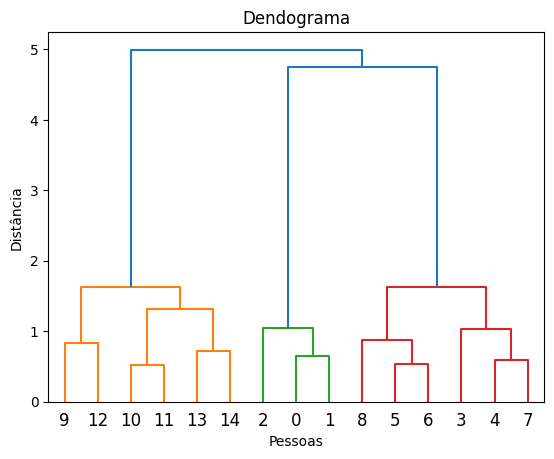

In [49]:
dendograma = dendrogram(linkage(base_salario, method="ward"))
plt.title("Dendograma")
plt.xlabel("Pessoas")
plt.ylabel("Distância");

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
hc_salario = AgglomerativeClustering(n_clusters=3, linkage='ward')
rotulos = hc_salario.fit_predict(base_salario)

In [53]:
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [54]:
grafico = px.scatter(x= base_salario[:, 0], y=base_salario[:, 1], color=rotulos)
grafico.show()

### Base cartão de crédito

In [55]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [ ]:
dendograma = dendrogram(linkage(X_cartao, method='ward'))

In [57]:
hc_cartao = AgglomerativeClustering(n_clusters=3, linkage='ward')
rotulos = hc_cartao.fit_predict(X_cartao) 

In [58]:
rotulos

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
grafico = px.scatter(x=X_cartao[:, 0], y=X_cartao[:, 1], color=rotulos)
grafico.show()

# DBSCAN

### Base Salario e Idade

In [60]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [61]:
from sklearn.cluster import DBSCAN

In [64]:
dbscan_salario = DBSCAN(eps=0.95, min_samples=2)
dbscan_salario.fit(base_salario)

DBSCAN(eps=0.95, min_samples=2)

In [65]:
rotulos = dbscan_salario.labels_
rotulos

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int64)

In [66]:
grafico = px.scatter(x=base_salario[:, 0], y=base_salario[:, 1], color=rotulos)
grafico.show()

### Base Cartão de crédito

In [67]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [80]:
dbscan_cartao = DBSCAN(eps=0.37, min_samples=5)
rotulos = dbscan_cartao.fit_predict(X_cartao)

In [81]:
rotulos

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
np.unique(rotulos, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([   52, 29920,    18,    10], dtype=int64))

In [83]:
grafico = px.scatter(x=X_cartao[:, 0], y=X_cartao[:, 1], color=rotulos)
grafico.show()

# K-means X Hierarquico X DBSCAN

In [84]:
from sklearn import datasets

In [87]:
X_random, Y_random = datasets.make_moons(n_samples=1500, noise=0.09)

In [88]:
grafico = px.scatter(x=X_random[:, 0], y=X_random[:, 1])
grafico.show()

In [90]:
kmeans = KMeans(n_clusters=2)
rotulos = kmeans.fit_predict(X_random)
grafico = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color=rotulos)
grafico.show()

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [91]:
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
rotulos = hc.fit_predict(X_random)
grafico = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color=rotulos)
grafico.show()

In [93]:
dbscan = DBSCAN(eps=0.1)
rotulos = dbscan.fit_predict(X_random)
grafico = px.scatter(x=X_random[:, 0], y=X_random[:, 1], color=rotulos)
grafico.show()